In [1]:
from neuralprophet import NeuralProphet

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [3]:
df=pd.read_csv(r"C:\Users\Amey\PycharmProjects\weather forecasting\wdata\Temperature_And_Precipitation_Cities_IN\Delhi_NCR_1990_2022_Safdarjung.csv")

In [4]:
df.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,9.4,6.0,15.1,0.0
1,02-01-1990,9.3,5.2,14.2,0.0
2,03-01-1990,9.0,6.5,13.6,0.0
3,04-01-1990,10.7,6.0,17.5,0.0
4,05-01-1990,12.6,7.3,20.8,0.0


In [5]:
df.dtypes

time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
dtype: object

In [6]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

In [7]:
df.dtypes

time    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
dtype: object

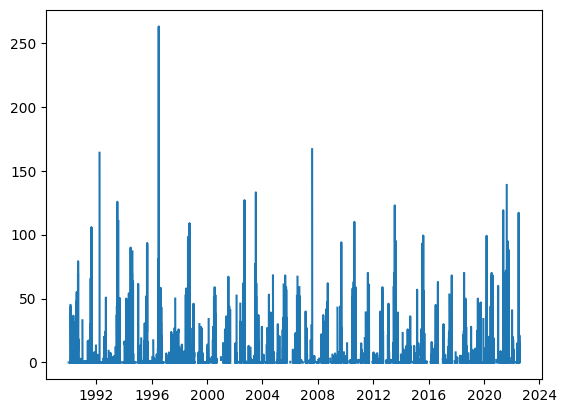

In [8]:
plt.plot(df['time'],df['prcp'])

In [9]:
data=df[['time','prcp']]
data.dropna(inplace=True)
data.columns=['ds','y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Amey\AppData\Local\Temp\ipykernel_29788\1627567933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,1990-01-01,0.0
1,1990-01-02,0.0
2,1990-01-03,0.0
3,1990-01-04,0.0
4,1990-01-05,0.0


In [10]:
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [11]:
model=NeuralProphet()  #untrained neuralprophet model
model.fit(data,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 85.662% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (180) is too small than the required number                     for the learning rate finder (244). The results might not be optimal.


Finding best initial lr:   0%|          | 0/244 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,26.885374,33.991249,0.547583,0.0,0
1,24.072029,30.428730,0.464813,0.0,1
2,21.528168,27.264055,0.393299,0.0,2
3,19.277609,24.397358,0.330280,0.0,3
4,17.180864,21.825161,0.273224,0.0,4
...,...,...,...,...,...
995,4.543471,10.084762,0.062783,0.0,995
996,4.539587,10.132410,0.062691,0.0,996
997,4.541146,10.024693,0.062762,0.0,997
998,4.542002,10.074058,0.062741,0.0,998


In [12]:
future=model.make_future_dataframe(data,periods=900)
forecast=model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 85.662% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 180it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-07-26,None,6.994728,3.630543,3.239200,0.124986
1,2022-07-27,None,6.799602,3.630413,3.227163,-0.057973
2,2022-07-28,None,6.582680,3.630282,3.215836,-0.263439
3,2022-07-29,None,6.869477,3.630153,3.205840,0.033484
4,2022-07-30,None,6.893428,3.630022,3.197762,0.065644


In [13]:
plot1=model.plot(forecast)


In [14]:
plot1


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'aa7d75ee-2416-4db8-8470-4e19866d0d58',
              'x': array([datetime.datetime(2022, 7, 26, 0, 0),
                          datetime.datetime(2022, 7, 27, 0, 0),
                          datetime.datetime(2022, 7, 28, 0, 0), ...,
                          datetime.datetime(2025, 1, 8, 0, 0),
                          datetime.datetime(2025, 1, 9, 0, 0),
                          datetime.datetime(2025, 1, 10, 0, 0)], dtype=object),
              'y': array([6.994728 , 6.799602 , 6.5826797, ..., 2.9288235, 2.7518215, 3.0723965],
                         dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '

In [15]:
with open('delhi_prec_model.pkl','wb') as f:
    pickle.dump(model,f)